#Sarcasm Analysis model development v0.2
###For TrendSentimentAnalysis (tsa.)
Joyster Rodrigues | 2018487

#Importing Dependencies & Datasets, etc.

In [ ]:
#imports
import tensorflow as tf
import json
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/sarcasm.json \
    -O /tmp/sarcasm.json

##Pre-processing dataset

In [ ]:
#dataset
with open('/tmp/sarcasm.json', 'r') as f:
  dataset = json.load(f)

x_sentences = []
y_labels = []

for item in dataset:
  x_sentences.append(item['headline'])
  y_labels.append(item['is_sarcastic'])

In [ ]:
#split dataset to train & test
train_size = round(len(dataset) * 0.70)

x_train = x_sentences[0:train_size]
x_test = x_sentences[train_size:]
y_train = y_labels[0:train_size]
y_test = y_labels[train_size:]

In [ ]:
#text to numeric encoding
#tokenization & padding
tokenizer = Tokenizer(num_words=10000, oov_token='<00V>')
tokenizer.fit_on_texts(x_train)

word_index = tokenizer.word_index

x_train_seq = tokenizer.texts_to_sequences(x_train)
x_train_pad = pad_sequences(x_train_seq, maxlen=100, padding='post', truncating='post')

x_test_seq = tokenizer.texts_to_sequences(x_test)
x_test_pad = pad_sequences(x_test_seq, maxlen=100, padding='post', truncating='post')

In [ ]:
#converting py array to np array
x_train_pad = np.array(x_train_pad)
y_train = np.array(y_train)
x_test_pad = np.array(x_test_pad)
y_test = np.array(y_test)

#Model Architecture v0.2

In [ ]:
#model architecture 
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=100),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(rate=0.25),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 24)                408       
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
________________________________________________

In [ ]:
#fit model
epoch_runs = 5

hist = model.fit(x_train_pad, y_train, epochs=epoch_runs, validation_data=(x_test_pad, y_test), verbose=2)

Epoch 1/5
585/585 - 5s - loss: 0.6751 - accuracy: 0.5746 - val_loss: 0.6270 - val_accuracy: 0.5994 - 5s/epoch - 8ms/step
Epoch 2/5
585/585 - 4s - loss: 0.4754 - accuracy: 0.8016 - val_loss: 0.4254 - val_accuracy: 0.7921 - 4s/epoch - 6ms/step
Epoch 3/5
585/585 - 3s - loss: 0.3235 - accuracy: 0.8675 - val_loss: 0.3675 - val_accuracy: 0.8370 - 3s/epoch - 5ms/step
Epoch 4/5
585/585 - 3s - loss: 0.2674 - accuracy: 0.8939 - val_loss: 0.3427 - val_accuracy: 0.8564 - 3s/epoch - 5ms/step
Epoch 5/5
585/585 - 3s - loss: 0.2289 - accuracy: 0.9094 - val_loss: 0.3422 - val_accuracy: 0.8565 - 3s/epoch - 5ms/step


#Model evaluation

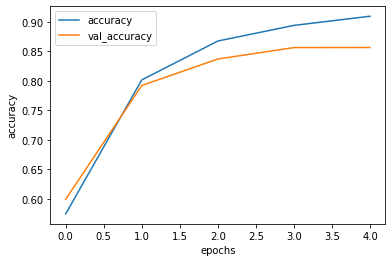

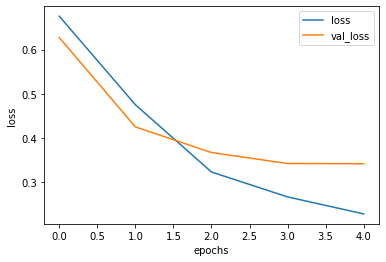

In [ ]:
# accuracy & loss 

def create_graphs(history, string):
  plt.plot(hist.history[string])
  plt.plot(hist.history['val_' + string])
  plt.xlabel('epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])
  plt.show()

create_graphs(hist, 'accuracy')
create_graphs(hist, 'loss')

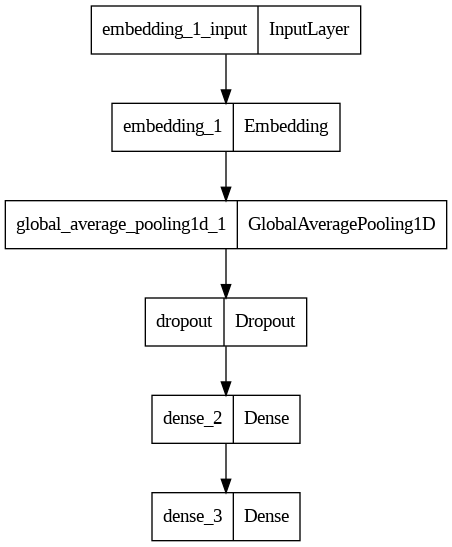

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)

#Testing model

In [ ]:
test_sentences = ['today has been a rough week']
test_seq = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_seq, maxlen=100, padding='post', truncating='post')

test_output = model.predict(test_padded)

1/1 [==============================] - 0s 28ms/step


In [ ]:
def sarc_classification(input):
  if input >= 0.5:
    return 'sarcasm detected'
  else: 
    return 'sarcasm may not be implied'

In [ ]:
print(sarc_classification(test_output))

sarcasm detected


#tsa. developement / integration


#Generating graphs for tsa.

##bar chart

In [ ]:
sarc_or_not = ['sarc', 'not-sarc']
scores = [pos,neg]
fig = plt.figure()
bar = fig.add_axes([0,0,1,1])
colors = ['green', 'red']
bar.bar(sents, scores, color=colors)
plt.title('iOS 16.3.1 tsa results')
plt.xlabel('sentiments')
plt.ylabel('score')
plt.show()

##pie chart

In [ ]:
pie_labels = ['positive', 'negative']
pie = plt.pie(scores, labels=pie_labels)
plt.title('iOS 16.3.1 tsa results')
plt.show()